# Predicting Breast Cancer in Patient

# 1. import necessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/rohit/Desktop/final project/cancer.csv")
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

# 2. EDA

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 33)

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.isnull().sum().sum()

569

In [6]:
df.drop(['Unnamed: 32'],axis =1, inplace = True)

In [7]:
df.head(2)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  

[2 rows x 32 columns]

In [8]:
df.drop(['id'],axis =1, inplace = True)

In [9]:
df.head(20)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          M        17.99         10.38          122.80     1001.0   
1          M        20.57         17.77          132.90     1326.0   
2          M        19.69         21.25          130.00     1203.0   
3          M        11.42         20.38           77.58      386.1   
4          M        20.29         14.34          135.10     1297.0   
5          M        12.45         15.70           82.57      477.1   
6          M        18.25         19.98          119.60     1040.0   
7          M        13.71         20.83           90.20      577.9   
8          M        13.00         21.82           87.50      519.8   
9          M        12.46         24.04           83.97      475.9   
10         M        16.02         23.24          102.70      797.8   
11         M        15.78         17.89          103.60      781.0   
12         M        19.17         24.80          132.40     1123.0   
13         M        15.85         23.95          103.70      782.7   
14         M        13.73         22.61           93.60      578.3   
15         M        14.54         27.54           96.73      658.8   
16         M        14.68         20.13           94.74      684.5   
17         M        16.13         20.68          108.10      798.8   
18         M        19.81         22.15          130.00     1260.0   
19         B        13.54         14.36           87.46      566.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   
15          0.11390           0.15950         0.16390              0.07364   
16          0.09867           0.07200         0.07395              0.05259   
17          0.11700           0.20220         0.17220              0.10280   
18          0.09831           0.10270         0.14790              0.09498   
19          0.09779           0.08129         0.06664              0.04781   

    symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0          0.2419  ...         25.38          17.33           184.60   
1          0.1812  ...         24.99          23.41           158.80   
2          0.2069  ...         23.57          25.53           152.50   
3          0.2597  ...         14.91          26.50            98.87   
4          0.1809  ...         22.54          16.67           152.20   
5          0.2087  ...         15.47          23.75           103.40   
6          0.1794  ...         22.88          27.66           153.20   
7          0.2196  ...         17.06          28.14           110.60   
8          0.2350  ...         15.49          30.73           106.20   
9          0.2030  ...         15.09          40.68            97.65   
10         0.1528  ...         19.19          33.88           123.80   
11         0.1842  ...       

In [10]:
le = LabelEncoder()
le.fit(df['diagnosis'])
df['diagnosis'] = le.transform(df['diagnosis'])

In [11]:
df.head(15)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           1        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           1        19.69         21.25          130.00     1203.0   
3           1        11.42         20.38           77.58      386.1   
4           1        20.29         14.34          135.10     1297.0   
5           1        12.45         15.70           82.57      477.1   
6           1        18.25         19.98          119.60     1040.0   
7           1        13.71         20.83           90.20      577.9   
8           1        13.00         21.82           87.50      519.8   
9           1        12.46         24.04           83.97      475.9   
10          1        16.02         23.24          102.70      797.8   
11          1        15.78         17.89          103.60      781.0   
12          1        19.17         24.80          132.40     1123.0   
13          1        15.85         23.95          103.70      782.7   
14          1        13.73         22.61           93.60      578.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   

    symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0          0.2419  ...         25.38          17.33           184.60   
1          0.1812  ...         24.99          23.41           158.80   
2          0.2069  ...         23.57          25.53           152.50   
3          0.2597  ...         14.91          26.50            98.87   
4          0.1809  ...         22.54          16.67           152.20   
5          0.2087  ...         15.47          23.75           103.40   
6          0.1794  ...         22.88          27.66           153.20   
7          0.2196  ...         17.06          28.14           110.60   
8          0.2350  ...         15.49          30.73           106.20   
9          0.2030  ...         15.09          40.68            97.65   
10         0.1528  ...         19.19          33.88           123.80   
11         0.1842  ...         20.42          27.28           136.50   
12         0.2397  ...         20.96          29.94           151.70   
13         0.1847  ...         16.84          27.66           112.00   
14         0.2069  ...         15.03          32.01           108.80   

    area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       2019.0            0.1622             0.6656           0.7119   
1       1956.0            0.1238             0.1866           0.2416   
2       1709.0            0.1444             0.4245           0.4504   
3        567.7            0.2098             0.8663           0.6869   
4       1575.0            0.1374             0.2050           0.4000   
5        741.6            0.1791 

In [12]:
print(df.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [13]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

# 3.Data visualization

<Axes: xlabel='diagnosis', ylabel='count'>

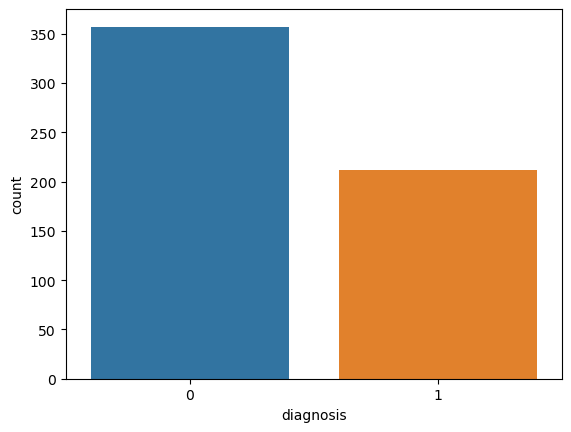

In [14]:
sns.countplot(data = df, x ='diagnosis', label = 'count')

In [15]:
df.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

<Axes: >

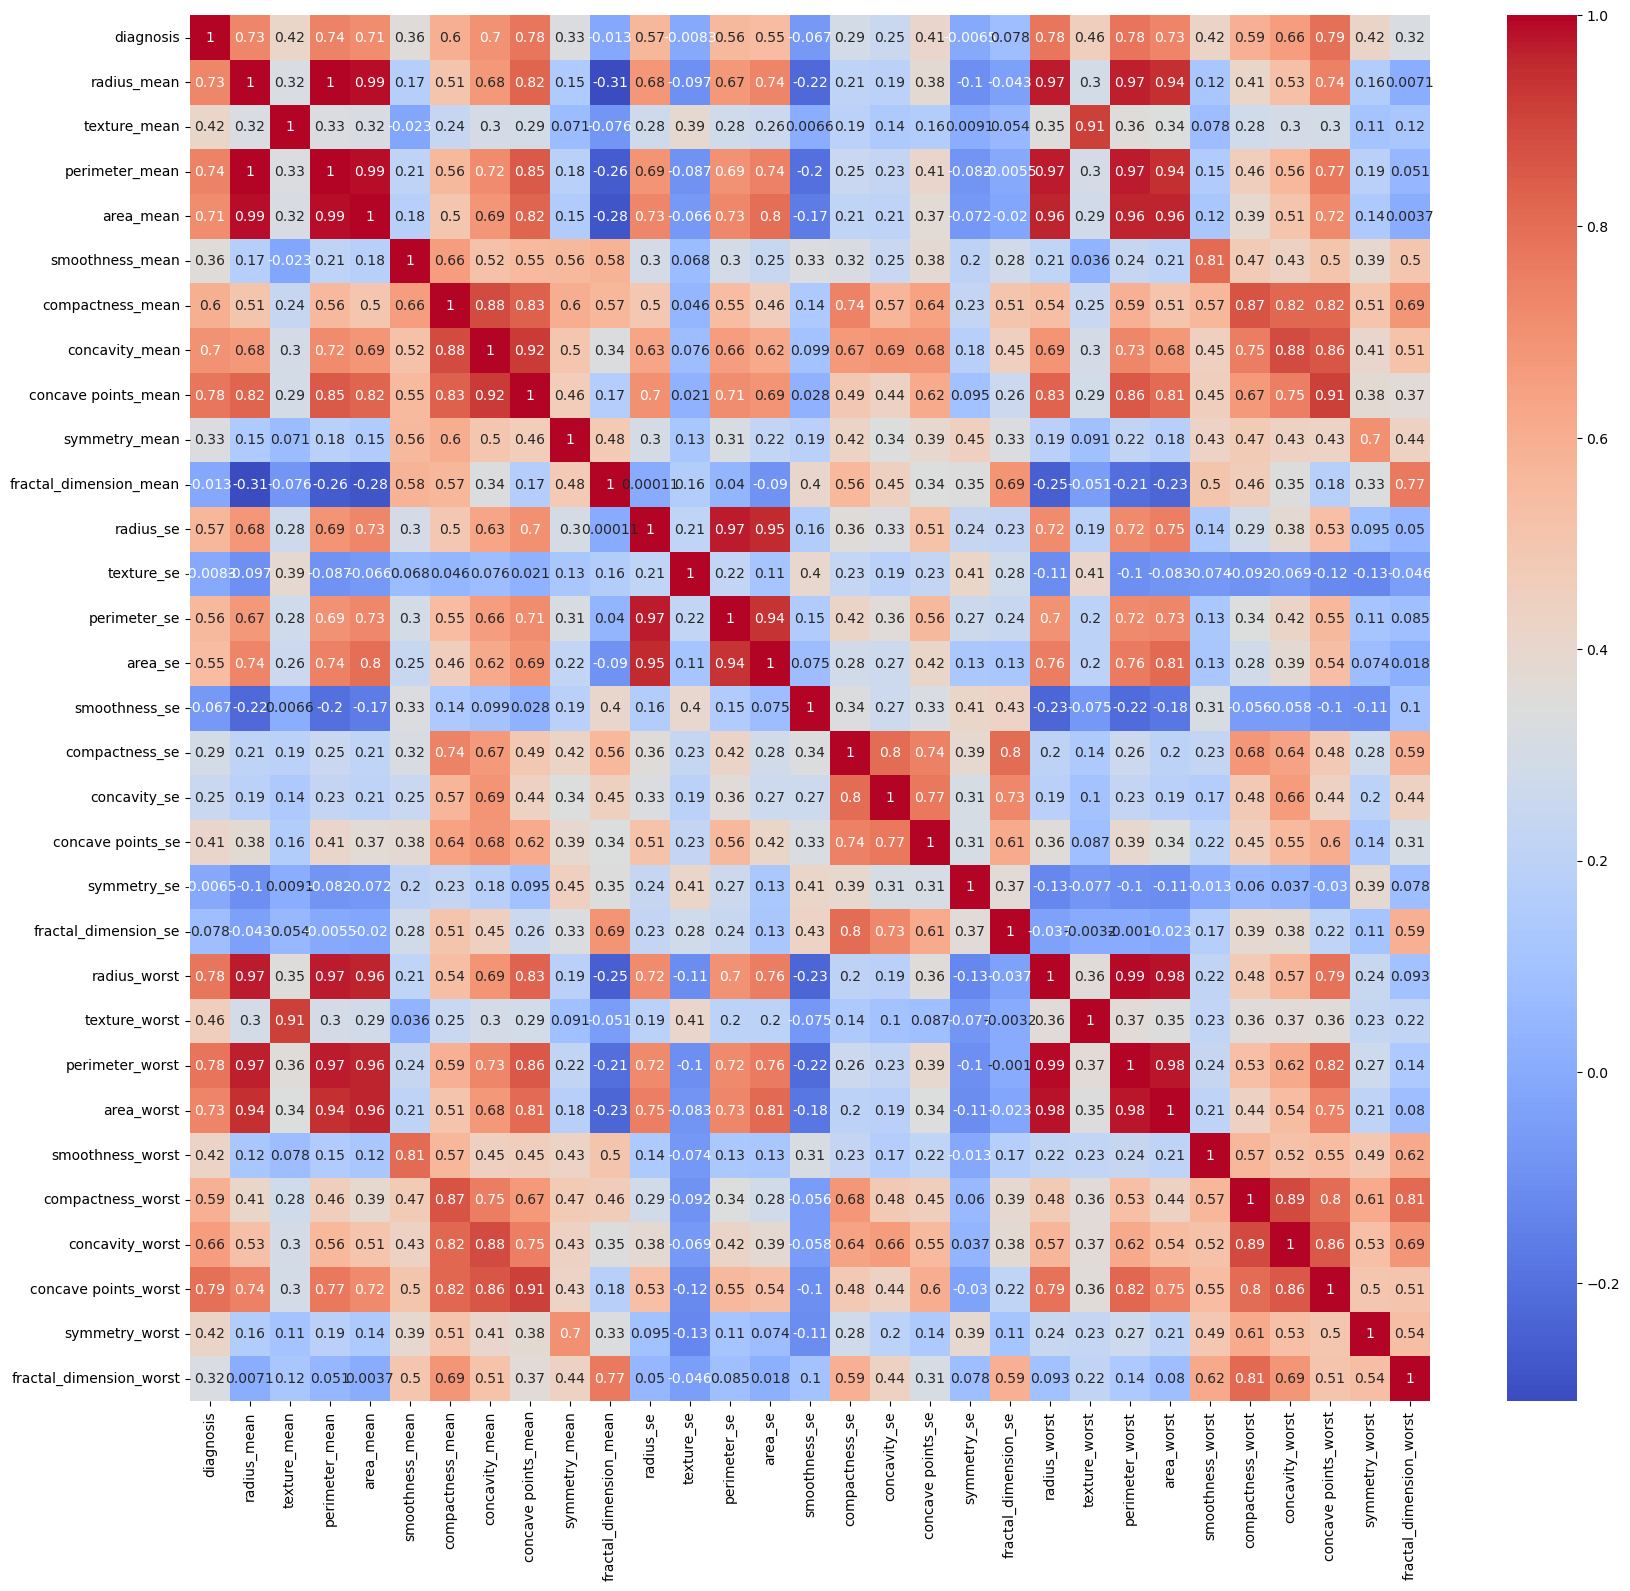

In [16]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')

In [17]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
mean_column = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
               'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
               'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

se_column = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']

worst_column = ['diagnosis','radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst',
                'compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']

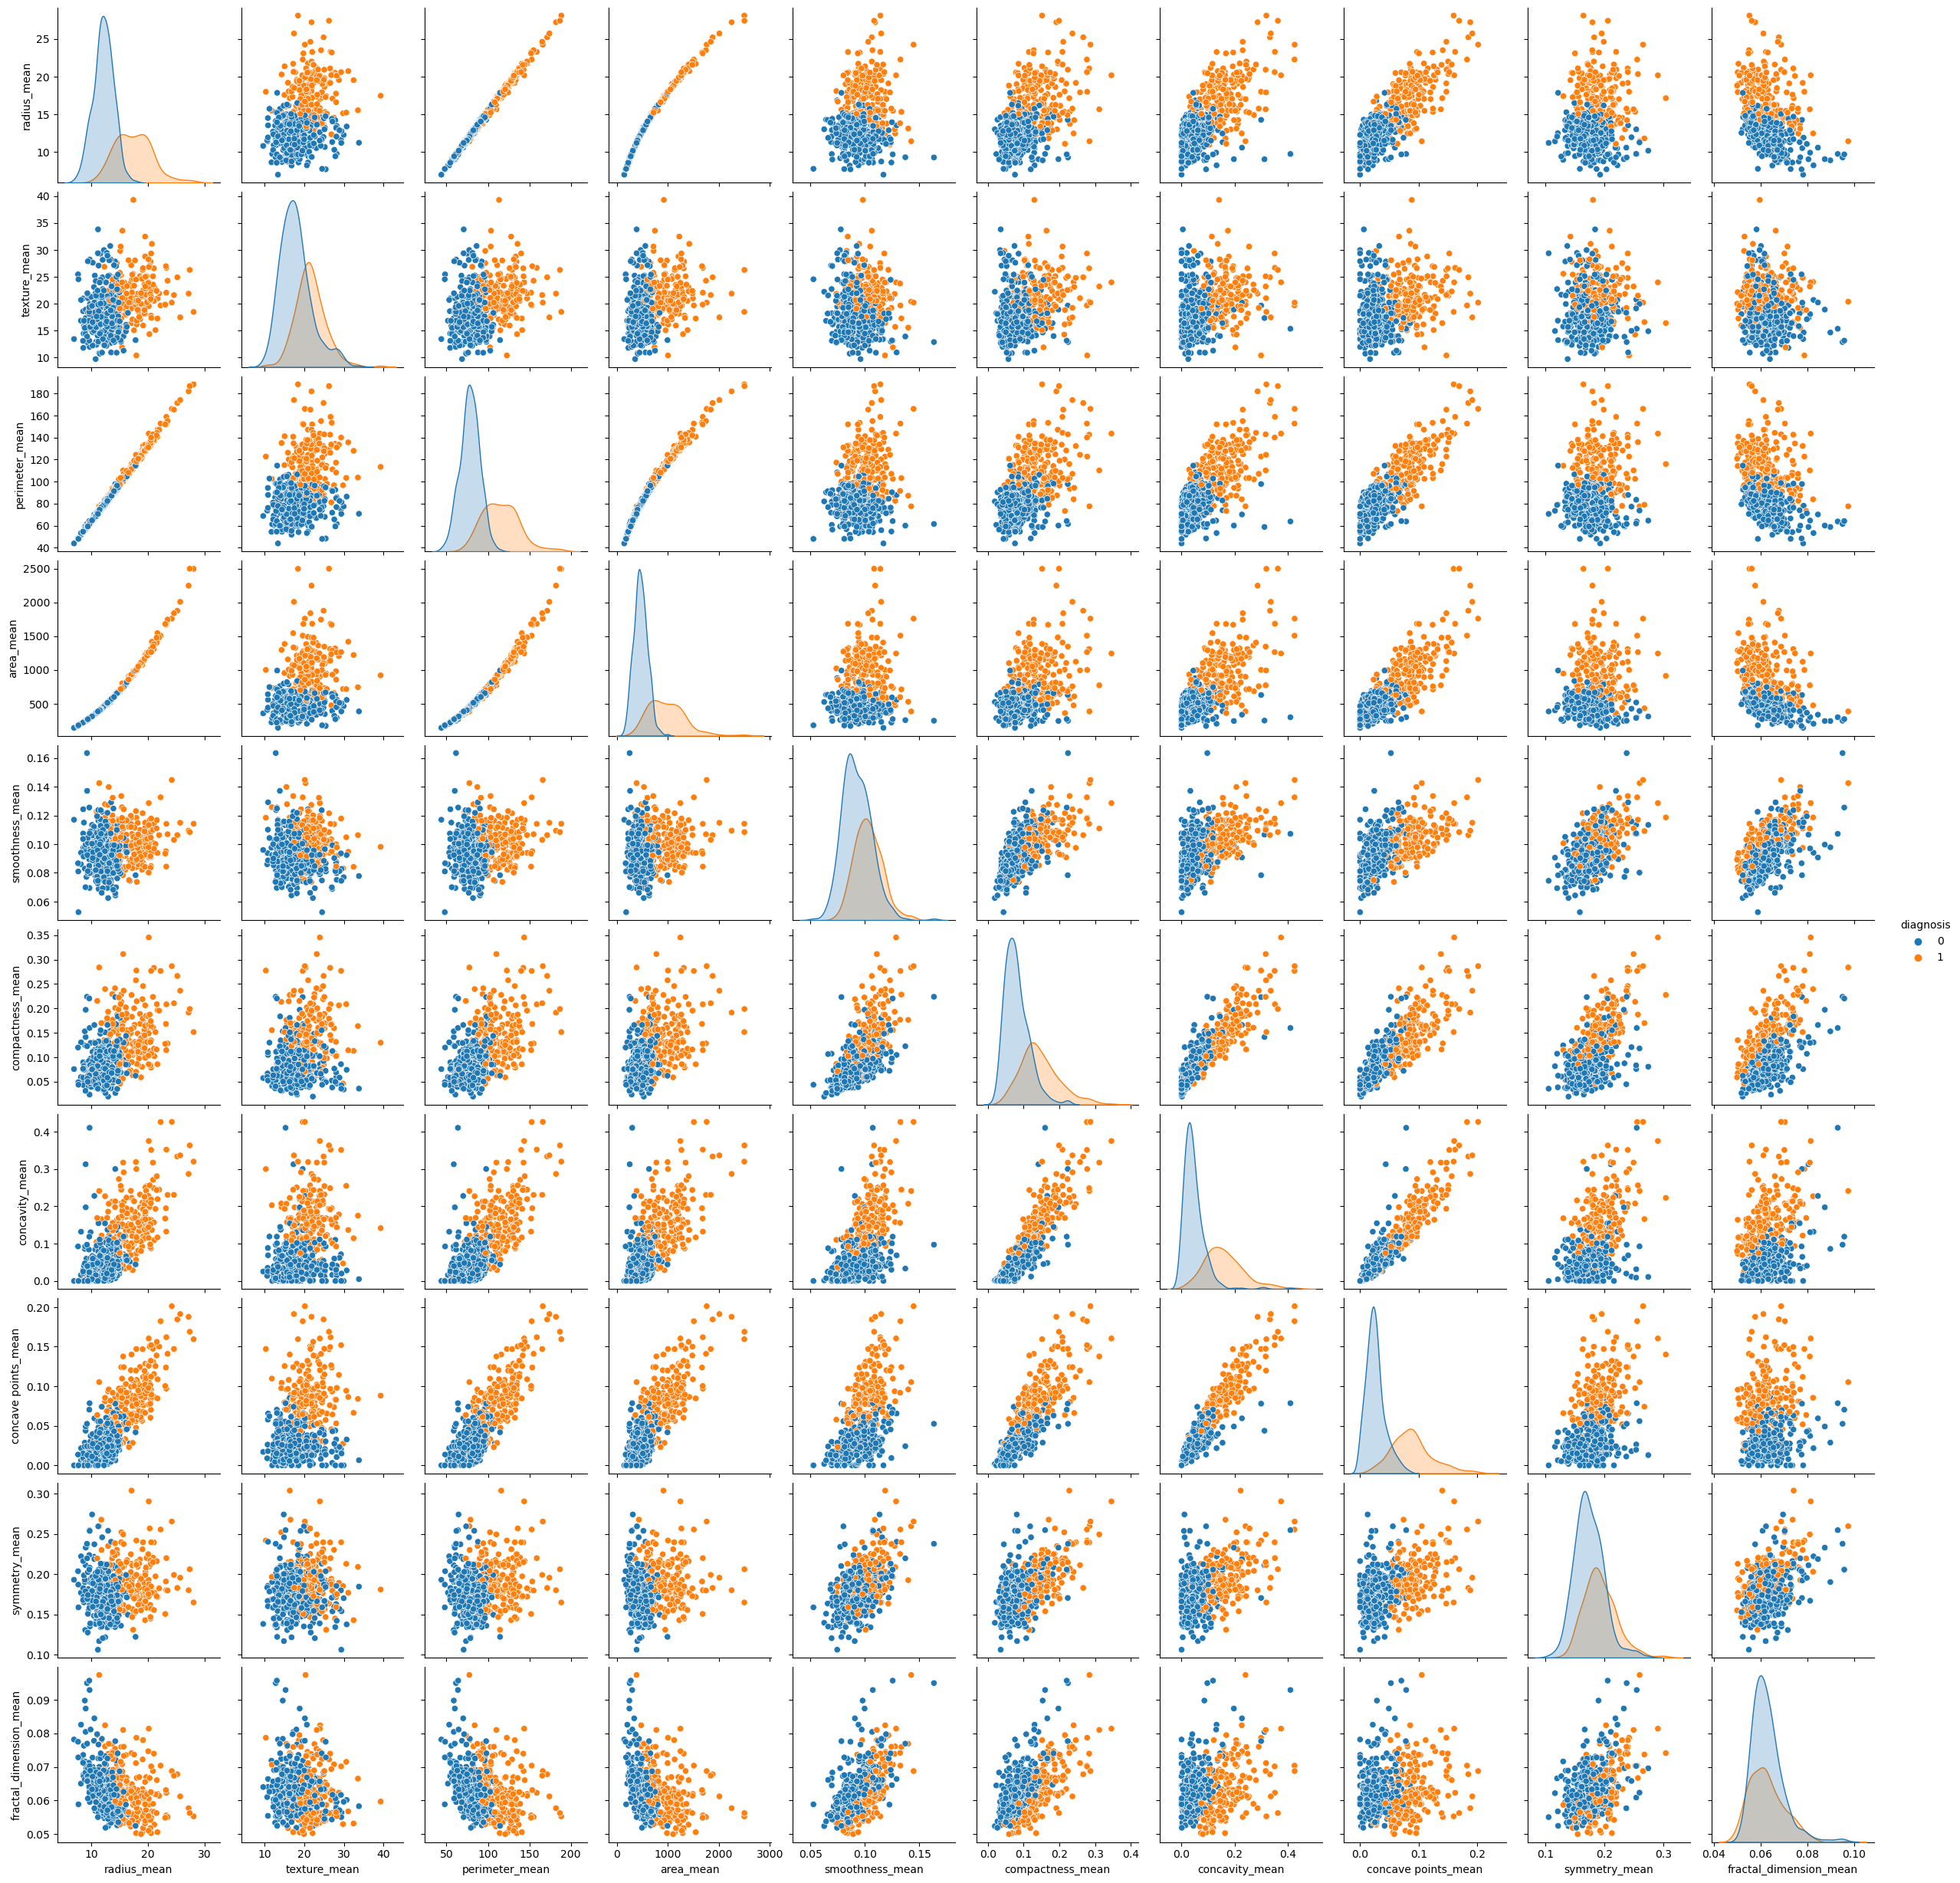

In [19]:
sns.pairplot(df[mean_column], hue = 'diagnosis')

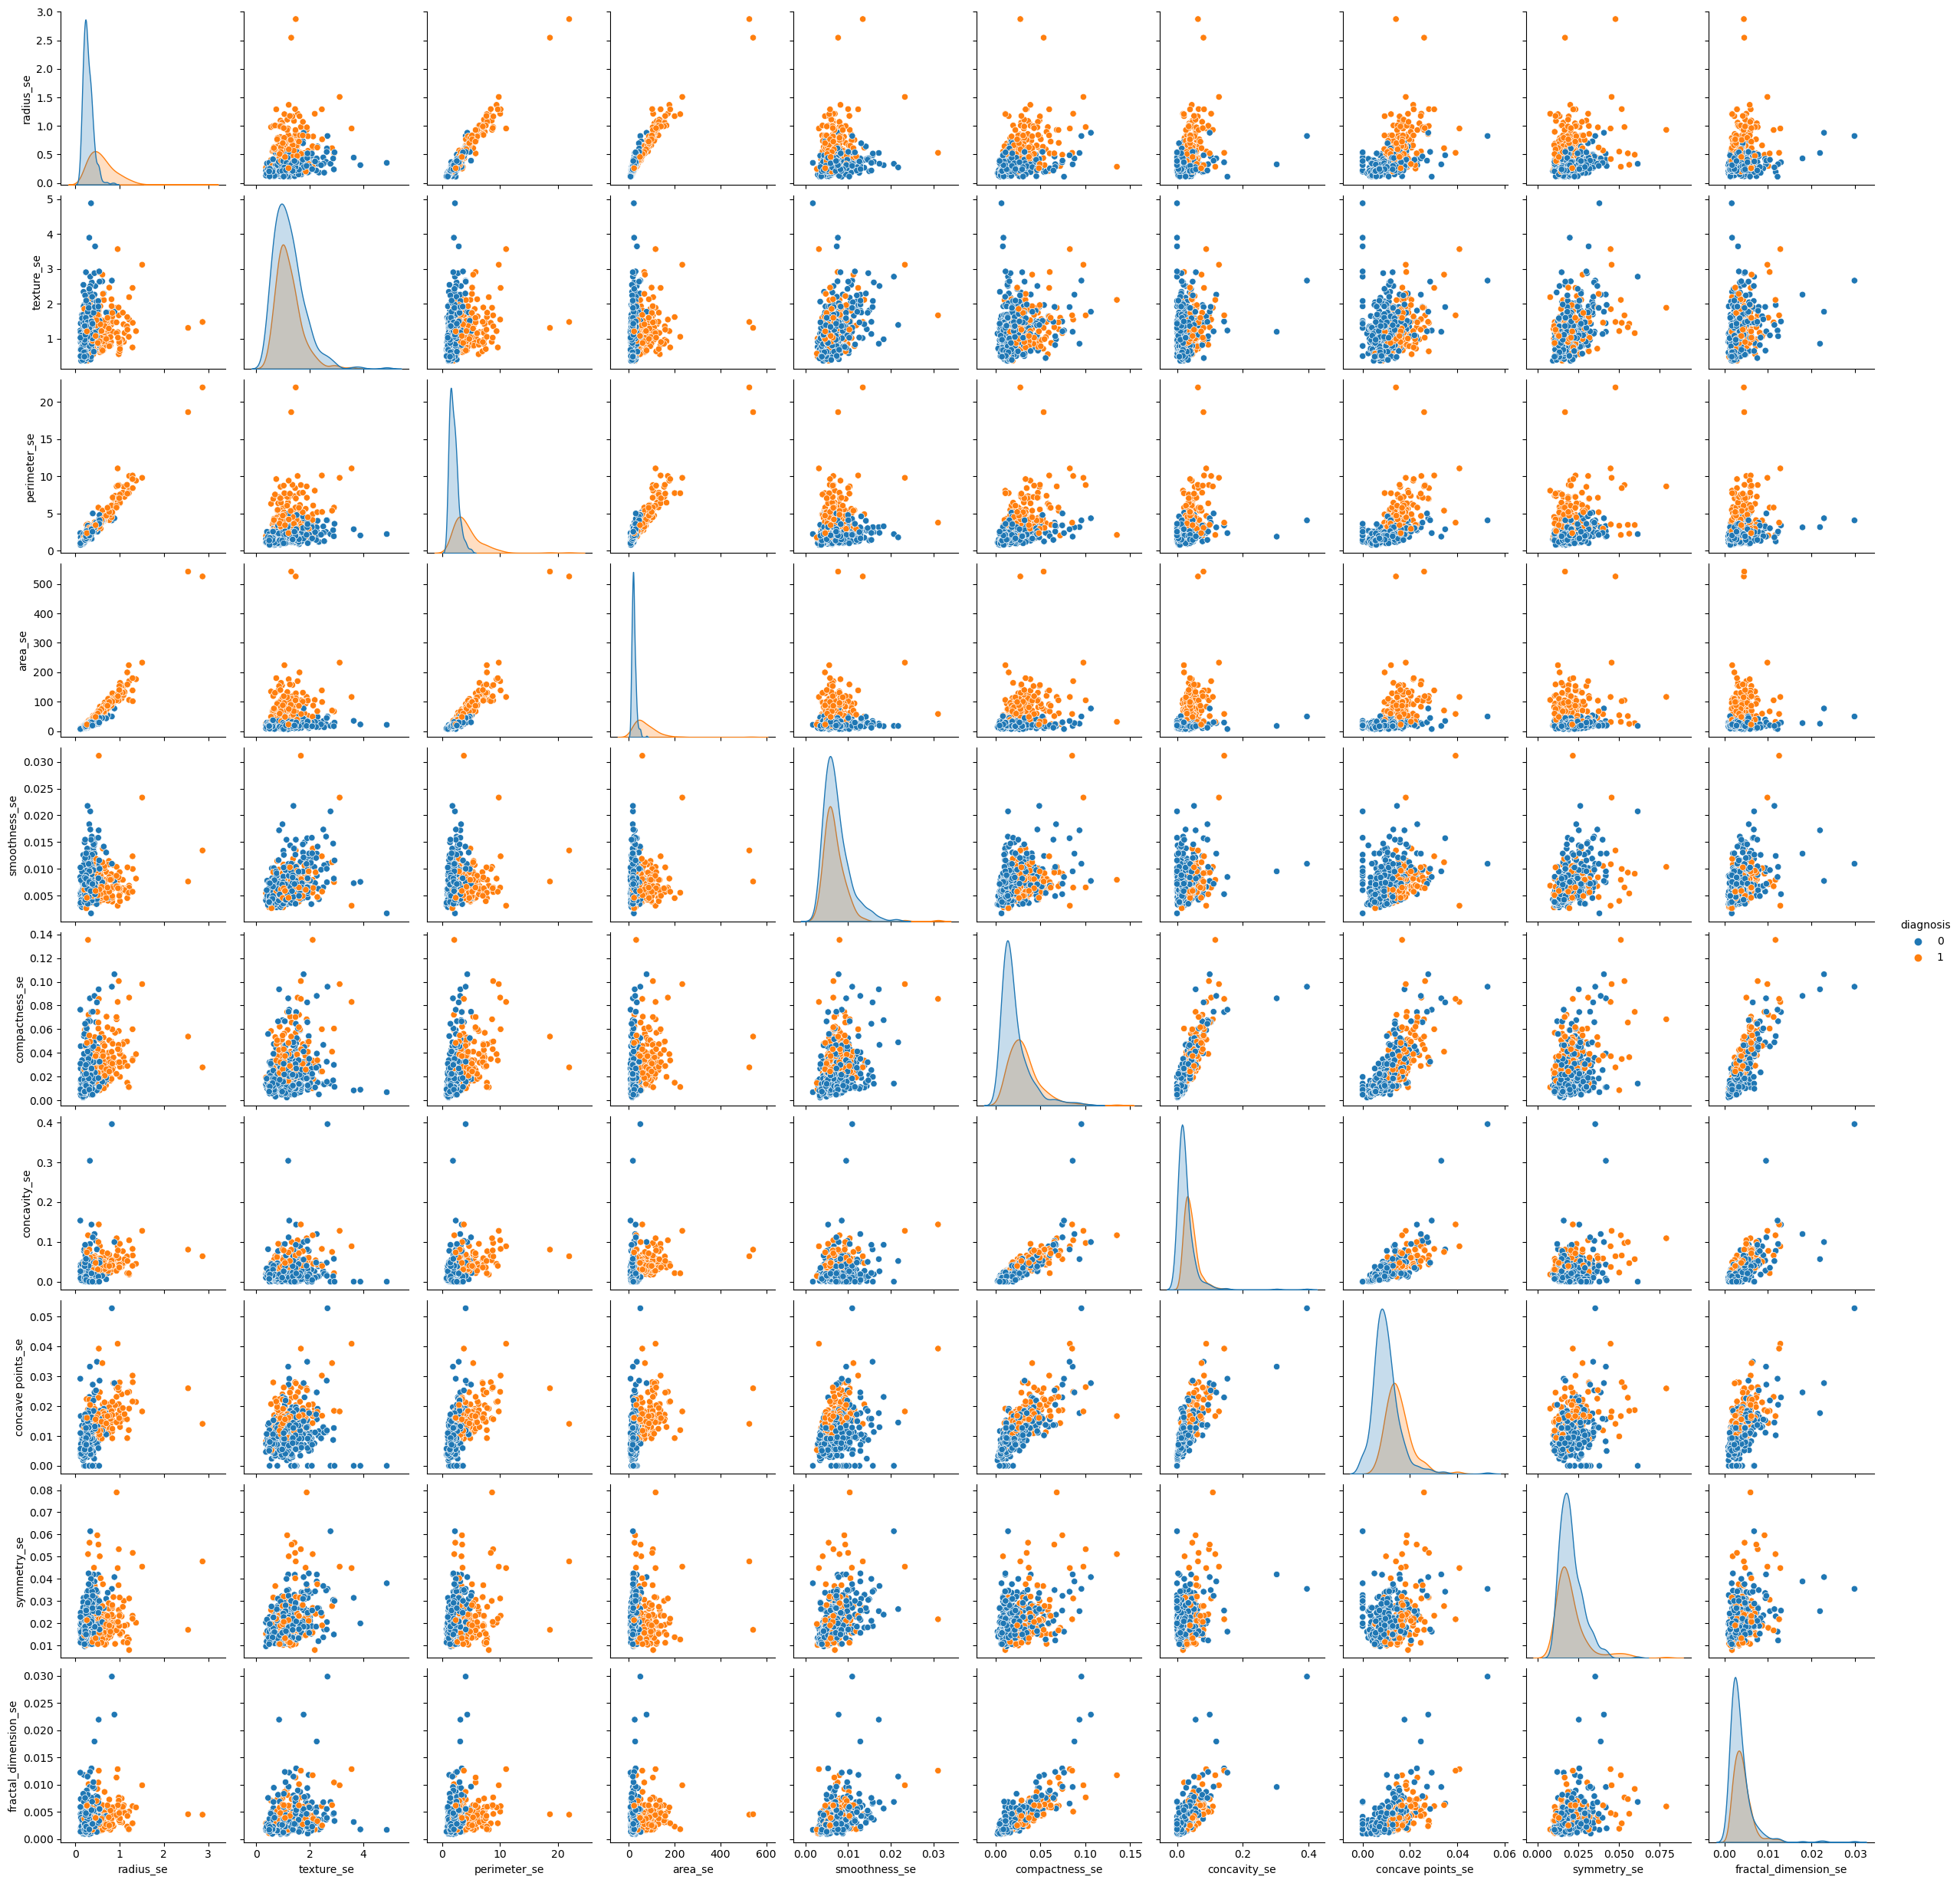

In [20]:
sns.pairplot(df[se_column], hue = 'diagnosis')

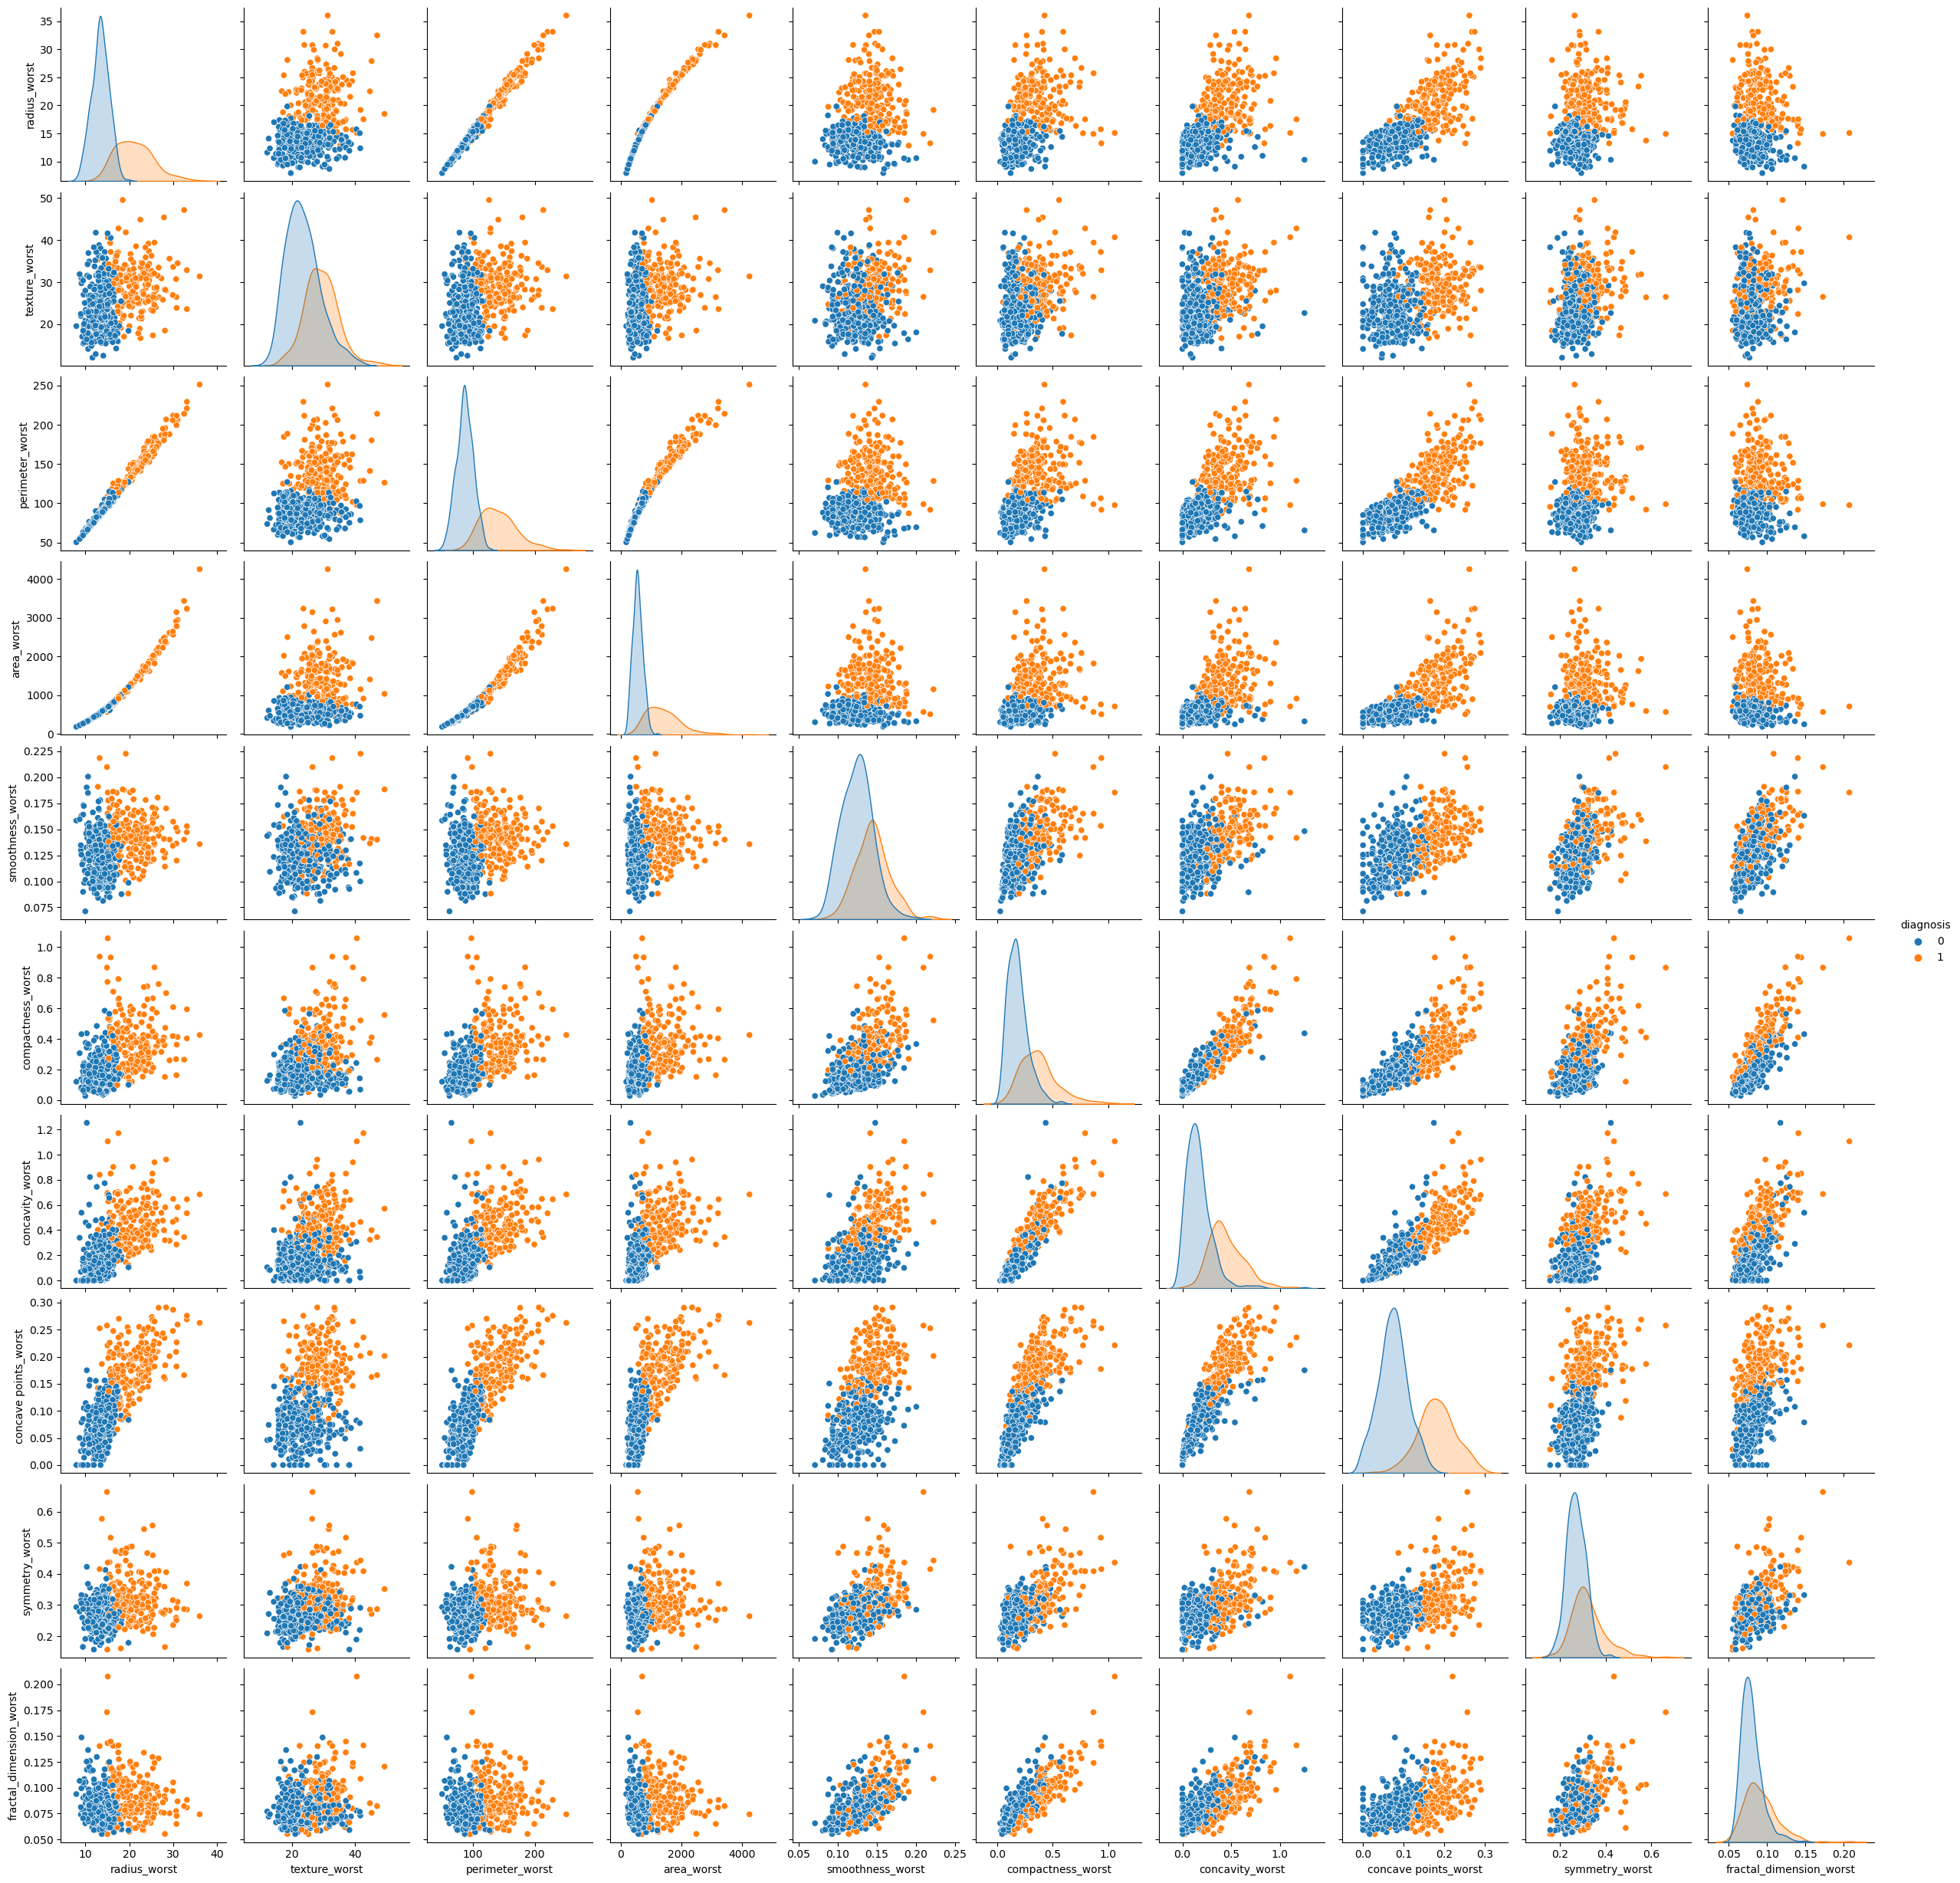

In [21]:
sns.pairplot(df[worst_column], hue = 'diagnosis')

# 4.Building the Model

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc,roc_auc_score

X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=10)


# 5.Results

In [23]:
svm = SVC(C=0.1, kernel='linear', gamma='auto')
svm.fit(X_train,y_train)
prediction = svm.predict(X_test)
print('prediction: ',prediction)

prediction:  [1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1]


In [24]:
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))

0.9604395604395605
0.9473684210526315


In [25]:
print('confusion matrix:\n',confusion_matrix(prediction,y_test))

confusion matrix:
 [[71  2]
 [ 4 37]]


In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()

In [27]:
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

In [28]:
y_scores = svm.decision_function(X_test)
auc_roc = roc_auc_score(y_test, y_scores)

In [29]:
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("AUC-ROC:", auc_roc)

Specificity: 0.9466666666666667
Sensitivity: 0.9487179487179487
AUC-ROC: 0.9917948717948718


In [30]:
print('classification_report:\n',classification_report(y_test,prediction))

classification_report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.90      0.95      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [31]:
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)
prediction = svm.predict(X_test)
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))

0.9186813186813186
0.9210526315789473


In [32]:
print('confusion matrix:\n',confusion_matrix(prediction,y_test))

confusion matrix:
 [[73  7]
 [ 2 32]]


In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("AUC-ROC:", auc_roc)

Specificity: 0.9733333333333334
Sensitivity: 0.8205128205128205
AUC-ROC: 0.9917948717948718


In [34]:
print('classification_report:\n',classification_report(y_test,prediction))

classification_report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        75
           1       0.94      0.82      0.88        39

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [35]:
svm = SVC(kernel='poly')
svm.fit(X_train,y_train)
prediction = svm.predict(X_test)
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))

0.9142857142857143
0.8947368421052632


In [36]:
print('confusion_matrix:\n',confusion_matrix(prediction,y_test))

confusion_matrix:
 [[73 10]
 [ 2 29]]


In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("AUC-ROC:", auc_roc)

Specificity: 0.9733333333333334
Sensitivity: 0.7435897435897436
AUC-ROC: 0.9917948717948718


In [38]:
print('classification_report:\n',classification_report(y_test,prediction))

classification_report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        75
           1       0.94      0.74      0.83        39

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114

